## Introduction

Unfortunately, `Matplotlib` does not have a function to generate streamcharts out of the box. Instead, it's up to you to smooth the data and use a [`stacked area plot`](https://www.python-graph-gallery.com/stacked-area-plot/) to get a streamchart. 

This may be quite challenging in the beginning. But don't be afraid, we have this small section for you. Here, we're gonna try to explain step-by-step how to convert a regular stackplot into a beautiful and smooth streamchart.



## Basic stacked area chart
The gallery has a [whole section](https://www.python-graph-gallery.com/stacked-area-plot/) on stacked area chart and it is probably a good idea to get familiar with this kind of chart first. Let's get started by creating the most basic stackplot in Matplotlib:

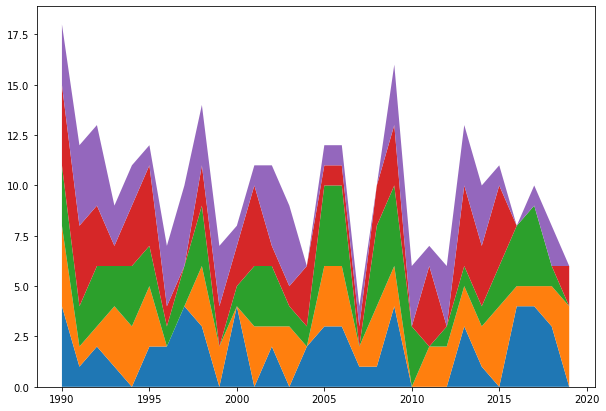

In [6]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x = np.arange(1990, 2020) # (N,) array-like

y = [np.random.randint(0, 5, size=30) for _ in range(5)] # (M, N) array-like

fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y);

And that's it, a simple stackplot. Not too much work, not a shocking result either. A message to take from here is that `.stackplot()` recycles the values of `x`. In other words, the same 30 values in `x` are used for the 5 sequences in `y`. 

## Change the baseline

The next step is to use the `baseline` argument, which controls how to stack the different areas. The default is `"zero"` and it means the baseline is a constant at zero and the result is the simple stackplot above. Other options are `sym`, `wiggle` and `weighted_wiggle`. 

Let's use `sym`, which means the baseline stack is going to be symmetric around the horizontal 0 line:

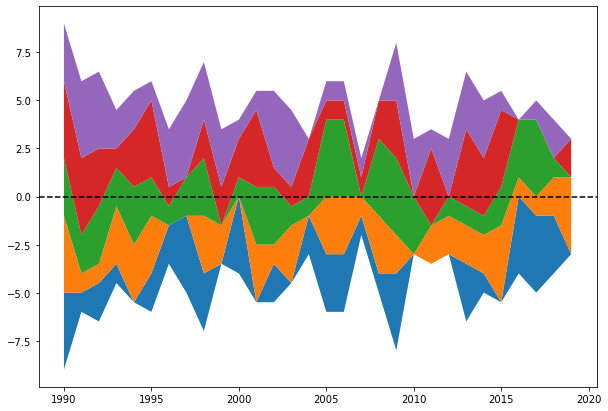

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y, baseline="sym")
ax.axhline(0, color="black", ls="--");

If you put the colors aside, you can see the shape below the horizontal line is a mirrored version of the shape on top. Instead of stacking the areas one on top of each other, this method stacks the individual areas in such a way that both the lower and upper limits of the filled area as a whole are at the same distance from the horizontal line.



## Smoothing the stacked area chart

The result above puts us only a tiny step closer to what we aim to have today. Having the symmetry is nice, but what we want now is to make it **smoother**. To do so, we use a data smoothing technique. 

Smoothing is a process by which data points are averaged with their neighbors. For example, the value of `y` when `x` is 2000 is an average of the points around `y`. There are many data smoothing techniques. In this problem, we're going to use a Gaussian kernel smoothing. 

The **kernel** for smoothing defines the shape of the function that is used to take the average of the neighboring points. A Gaussian kernel is a kernel with the shape of a Gaussian curve. Here is a standard Gaussian with a mean of 0 and a standard deviation of 1:

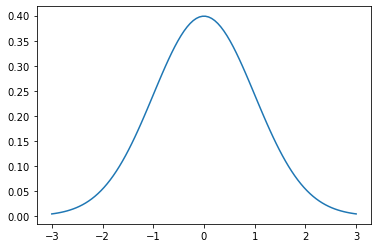

In [8]:
grid = np.linspace(-3, 3, num=100)
plt.plot(grid, stats.norm.pdf(grid));

The basic process of smoothing is very simple. It goes through the data point by point. For each data point, we generate a new value that is some function of the original value at that point and the surrounding data points. With Gaussian smoothing, we center a Gaussian curve at each point, assign weights to that point and the surrounding points according to the curve, and compute a weighted average of the points.

How smooth is the Gaussian smoothing is controlled by the standard deviation of the Gaussian curve. For now, let's stick to the default standard deviation of 1.

For each point `m` in the sequence `x`, put a Gaussian curve with standard deviation `sd`. In this function `x` is both the sequence and the grid at which the gaussian curve is evaluated. The `np.array()` wrap converts it into a `(len(x), len(x))` array. The next line normalizes the weights so they add up to 1 for each sequence in `y`. Finally, the function returns an array where the `x` values are a weighted average resulting from using a Gaussian smoothing.

In [9]:
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)

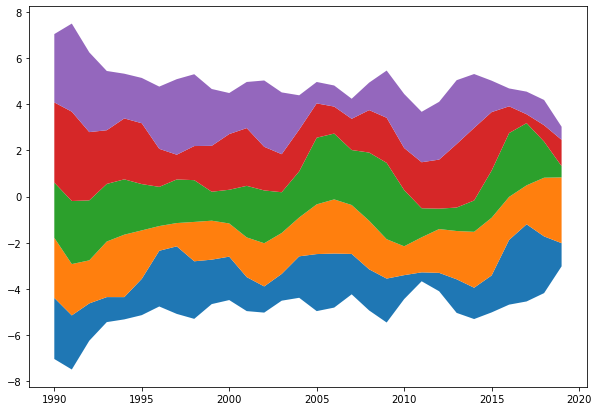

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
y_smoothed = [gaussian_smooth(x, y_, 1) for y_ in y]
ax.stackplot(x, y_smoothed, baseline="sym");

## Use a grid to make it smoother

It's definetely better than the previous result, but it's not the panacea either. The plot looks spiky yet. The problem is the Gaussian curve is evaluated at very few data points because we're using the values of `x`. In this case, it's possible to use a `grid` that spans the same range than `x`, but is much denser. The function and the plot then look as follows:

In [11]:
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

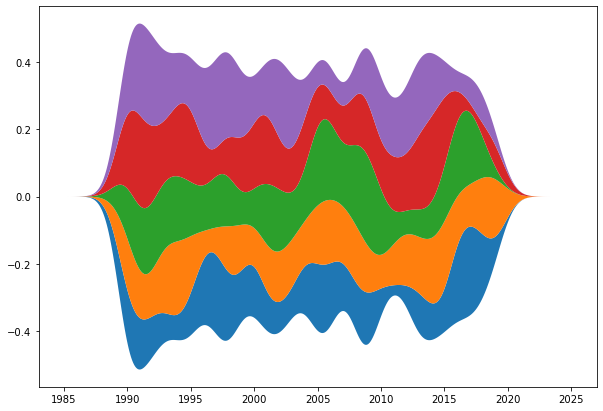

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
grid = np.linspace(1985, 2025, num=500)
y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]
ax.stackplot(grid, y_smoothed, baseline="sym");

Yay! That looks really looks smooth now! No spiky areas anymore.

Now, you may wonder how to control the degree of smoothness. Well, that's pretty simple actually. Remember the default standard deviation of 1? That can be changed. Smaller values will give more wiggly results, and bigger values will result in smoother ones. Let's better see an example:

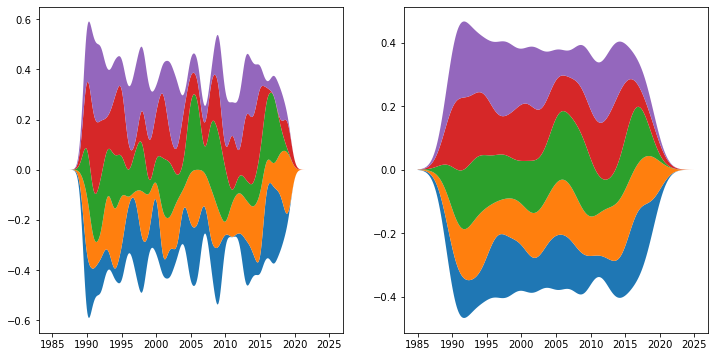

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# sd of 0.6
y_smoothed_1 = [gaussian_smooth(x, y_, grid, 0.6) for y_ in y]
# sd of 1.5
y_smoothed_2 = [gaussian_smooth(x, y_, grid, 1.5) for y_ in y]

ax[0].stackplot(grid, y_smoothed_1, baseline="sym")
ax[1].stackplot(grid, y_smoothed_2, baseline="sym");

## Color customization

And last but not least, let's see how to customize the colors of the filled areas. `stackplot` has a `colors` argument. Here you can pass a list of colors that will be used to color the different areas. If you pass less colors than the number of areas, they will be repeated.

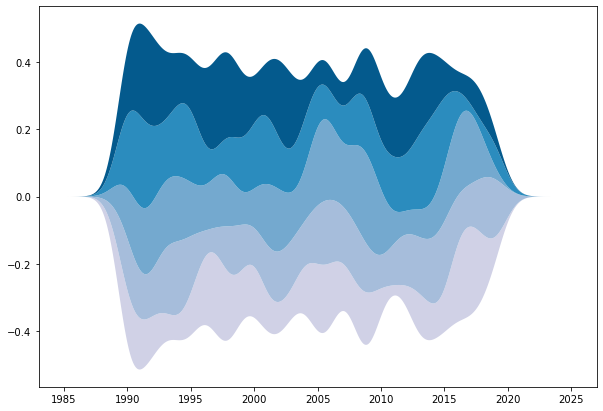

In [14]:
COLORS = ["#D0D1E6", "#A6BDDB", "#74A9CF", "#2B8CBE", "#045A8D"]
fig, ax = plt.subplots(figsize=(10, 7))
# Colors in the `COLORS` list are assigned to individual areas from bottom to top.
ax.stackplot(grid, y_smoothed, colors=COLORS, baseline="sym");

And that's it! We've seen howt to build a basic streamchart with Python and Matplotlib! You can now visit the [streamchart section](https://www.python-graph-gallery.com/streamchart/) of the gallery for more customized example!